In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from datetime import date, timedelta
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection  import train_test_split
from matplotlib import pyplot
import plotly.graph_objects as go
from scipy import stats
%matplotlib inline

In [37]:
#import original dataset 
df_train=pd.read_csv('E:/Kaggle_Competition_1/house-prices-advanced-regression-techniques/train.csv')
#df_test=pd.read_csv('E:/Kaggle_Competition_1/house-prices-advanced-regression-techniques/test.csv')

In [38]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [151]:
print(df_train.info())
#convert the dtype for any variables required. 
#Ex: arrival_date_month should be int, not object
#    Children should be int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             1460 non-null   int64         
 1   MSSubClass     1460 non-null   int64         
 2   MSZoning       1460 non-null   object        
 3   LotFrontage    1201 non-null   float64       
 4   LotArea        1460 non-null   int64         
 5   Street         1460 non-null   object        
 6   Alley          91 non-null     object        
 7   LotShape       1460 non-null   object        
 8   LandContour    1460 non-null   object        
 9   Utilities      1460 non-null   object        
 10  LotConfig      1460 non-null   object        
 11  LandSlope      1460 non-null   object        
 12  Neighborhood   1460 non-null   object        
 13  Condition1     1460 non-null   object        
 14  Condition2     1460 non-null   object        
 15  BldgType       1460 n

In [41]:
#convert dates data type from object to datetime
df_train[["YearBuilt", "YearRemodAdd", "GarageYrBlt","MoSold","YrSold"]] = df_train[["YearBuilt", "YearRemodAdd", "GarageYrBlt","MoSold","YrSold"]].apply(pd.to_datetime)
#df_test[["YearBuilt", "YearRemodAdd", "GarageYrBlt","MoSold","YrSold"]] = df_test[["YearBuilt", "YearRemodAdd", "GarageYrBlt","MoSold","YrSold"]].apply(pd.to_datetime)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             1460 non-null   int64         
 1   MSSubClass     1460 non-null   int64         
 2   MSZoning       1460 non-null   object        
 3   LotFrontage    1201 non-null   float64       
 4   LotArea        1460 non-null   int64         
 5   Street         1460 non-null   object        
 6   Alley          91 non-null     object        
 7   LotShape       1460 non-null   object        
 8   LandContour    1460 non-null   object        
 9   Utilities      1460 non-null   object        
 10  LotConfig      1460 non-null   object        
 11  LandSlope      1460 non-null   object        
 12  Neighborhood   1460 non-null   object        
 13  Condition1     1460 non-null   object        
 14  Condition2     1460 non-null   object        
 15  BldgType       1460 n

In [42]:
print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [43]:
df_train.describe()
#Datetime conversion of attributes have automatically removed the columns from this table
#ID can be ignored as it does not provide any insight
#the table mainly sheds light into data distribution and any skewness. 
#Ex: LotArea has outliers as the max value is 3 times the standard deviation 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,...,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,181.066207,456.098091,161.319273,441.866955,...,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,...,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,...,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,166.000000,712.250000,0.000000,808.000000,...,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


In [44]:
#list of the columns that contain null values
null_list = df_train.columns[df_train.isna().any()].tolist()
null_list

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [48]:
#Separate numerical and categorical variables
df_num=df_train.select_dtypes(include =['float64','int64']) 
df_cat=df_train.select_dtypes(exclude =['float64','int64']) 
#df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 48 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   MSZoning       1460 non-null   object        
 1   Street         1460 non-null   object        
 2   Alley          91 non-null     object        
 3   LotShape       1460 non-null   object        
 4   LandContour    1460 non-null   object        
 5   Utilities      1460 non-null   object        
 6   LotConfig      1460 non-null   object        
 7   LandSlope      1460 non-null   object        
 8   Neighborhood   1460 non-null   object        
 9   Condition1     1460 non-null   object        
 10  Condition2     1460 non-null   object        
 11  BldgType       1460 non-null   object        
 12  HouseStyle     1460 non-null   object        
 13  YearBuilt      1460 non-null   datetime64[ns]
 14  YearRemodAdd   1460 non-null   datetime64[ns]
 15  RoofStyle      1460 n

In [45]:
res = list(df_train.isnull().sum().items())
res
#The following attributes should be dropped as there's too many missing values. 
#For numerical attributes, the KNN method will be used to replace the values
#For categorical attributes, replacing missing values with mode will be used
#'Alley', 1369
#'PoolQC', 1453
#'Fence', 1179
# MiscFeature', 1406

[('Id', 0),
 ('MSSubClass', 0),
 ('MSZoning', 0),
 ('LotFrontage', 259),
 ('LotArea', 0),
 ('Street', 0),
 ('Alley', 1369),
 ('LotShape', 0),
 ('LandContour', 0),
 ('Utilities', 0),
 ('LotConfig', 0),
 ('LandSlope', 0),
 ('Neighborhood', 0),
 ('Condition1', 0),
 ('Condition2', 0),
 ('BldgType', 0),
 ('HouseStyle', 0),
 ('OverallQual', 0),
 ('OverallCond', 0),
 ('YearBuilt', 0),
 ('YearRemodAdd', 0),
 ('RoofStyle', 0),
 ('RoofMatl', 0),
 ('Exterior1st', 0),
 ('Exterior2nd', 0),
 ('MasVnrType', 8),
 ('MasVnrArea', 8),
 ('ExterQual', 0),
 ('ExterCond', 0),
 ('Foundation', 0),
 ('BsmtQual', 37),
 ('BsmtCond', 37),
 ('BsmtExposure', 38),
 ('BsmtFinType1', 37),
 ('BsmtFinSF1', 0),
 ('BsmtFinType2', 38),
 ('BsmtFinSF2', 0),
 ('BsmtUnfSF', 0),
 ('TotalBsmtSF', 0),
 ('Heating', 0),
 ('HeatingQC', 0),
 ('CentralAir', 0),
 ('Electrical', 1),
 ('1stFlrSF', 0),
 ('2ndFlrSF', 0),
 ('LowQualFinSF', 0),
 ('GrLivArea', 0),
 ('BsmtFullBath', 0),
 ('BsmtHalfBath', 0),
 ('FullBath', 0),
 ('HalfBath', 0),


In [57]:
from sklearn.impute import KNNImputer
from numpy import isnan

In [58]:
imputer = KNNImputer(n_neighbors=5)
df_filled = imputer.fit_transform(df_num)
print('Missing: %d' % sum(isnan(df_filled).flatten())) #confirms that no null values exist in the numerical attributes

Missing: 0


In [62]:
type(df_filled)

numpy.ndarray

In [152]:
column_names = df_num.columns
column_names

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice'],
      dtype='object')

In [70]:
#placing the table back into a dataframe
df_new = pd.DataFrame(df_filled, columns = column_names )
df_new.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1.0,60.0,65.0,8450.0,7.0,5.0,196.0,706.0,0.0,150.0,...,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,208500.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,0.0,978.0,0.0,284.0,...,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,181500.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,162.0,486.0,0.0,434.0,...,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,223500.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,0.0,216.0,0.0,540.0,...,3.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,140000.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,350.0,655.0,0.0,490.0,...,3.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,250000.0


In [105]:
#ensure no null values and all attributes are numerical
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   OverallQual    1460 non-null   float64
 5   OverallCond    1460 non-null   float64
 6   MasVnrArea     1460 non-null   float64
 7   BsmtFinSF1     1460 non-null   float64
 8   BsmtFinSF2     1460 non-null   float64
 9   BsmtUnfSF      1460 non-null   float64
 10  TotalBsmtSF    1460 non-null   float64
 11  1stFlrSF       1460 non-null   float64
 12  2ndFlrSF       1460 non-null   float64
 13  LowQualFinSF   1460 non-null   float64
 14  GrLivArea      1460 non-null   float64
 15  BsmtFullBath   1460 non-null   float64
 16  BsmtHalfBath   1460 non-null   float64
 17  FullBath       1460 non-null   float64
 18  HalfBath

In [ ]:
#Outlier treatment

In [109]:
from scipy import stats

In [112]:
z_scores = stats.zscore(df_new)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_num1 = df_new[filtered_entries]
df_num1

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1.0,60.0,65.0,8450.0,7.0,5.0,196.0,706.0,0.0,150.0,...,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,208500.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,162.0,486.0,0.0,434.0,...,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,223500.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,350.0,655.0,0.0,490.0,...,3.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,250000.0
6,7.0,20.0,75.0,10084.0,8.0,5.0,186.0,1369.0,0.0,317.0,...,2.0,636.0,255.0,57.0,0.0,0.0,0.0,0.0,0.0,307000.0
10,11.0,20.0,70.0,11200.0,5.0,5.0,0.0,906.0,0.0,134.0,...,1.0,384.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,129500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,1453.0,180.0,35.0,3675.0,5.0,5.0,80.0,547.0,0.0,0.0,...,2.0,525.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,145000.0
1453,1454.0,20.0,90.0,17217.0,5.0,5.0,0.0,0.0,0.0,1140.0,...,0.0,0.0,36.0,56.0,0.0,0.0,0.0,0.0,0.0,84500.0
1454,1455.0,20.0,62.0,7500.0,7.0,5.0,0.0,410.0,0.0,811.0,...,2.0,400.0,0.0,113.0,0.0,0.0,0.0,0.0,0.0,185000.0
1455,1456.0,60.0,62.0,7917.0,6.0,5.0,0.0,0.0,0.0,953.0,...,2.0,460.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,175000.0


In [114]:
#Correlation of variables
corr=df_num1.corr()
display(corr)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
Id,1.000000,0.021749,-0.032625,0.010552,-0.029959,-0.002458,-0.039715,0.016349,0.005411,-0.010937,...,0.011011,0.008438,-0.028718,-0.030895,-0.001445,0.013890,0.022532,NaN,-0.052664,-0.026592
MSSubClass,0.021749,1.000000,-0.552044,-0.504115,0.134889,-0.093675,0.079320,-0.088457,0.002298,-0.150748,...,0.008685,-0.071186,0.009953,0.036902,-0.069763,-0.026376,-0.044127,NaN,-0.056279,-0.037048
LotFrontage,-0.032625,-0.552044,1.000000,0.680597,0.206941,-0.013385,0.126201,0.161885,0.008819,0.134136,...,0.309273,0.357815,0.105384,0.134278,-0.035020,-0.003926,0.042718,NaN,0.034336,0.392951
LotArea,0.010552,-0.504115,0.680597,1.000000,0.146141,-0.053392,0.090917,0.153508,-0.005394,0.097699,...,0.268182,0.298860,0.151159,0.088525,-0.028256,0.009714,0.057850,NaN,0.044226,0.361769
OverallQual,-0.029959,0.134889,0.206941,0.146141,1.000000,-0.195798,0.389995,0.160322,-0.143246,0.321515,...,0.619402,0.563203,0.248219,0.356585,-0.173919,-0.001643,-0.033875,NaN,-0.061348,0.813377
OverallCond,-0.002458,-0.093675,-0.013385,-0.053392,-0.195798,1.000000,-0.137868,-0.002472,0.068292,-0.155244,...,-0.232577,-0.187954,-0.048707,-0.106439,0.132907,-0.016556,0.098002,NaN,0.115121,-0.160212
MasVnrArea,-0.039715,0.079320,0.126201,0.090917,0.389995,-0.137868,1.000000,0.227096,-0.050383,0.081226,...,0.350935,0.341248,0.181165,0.138100,-0.145643,-0.019955,-0.029276,NaN,-0.050656,0.420111
BsmtFinSF1,0.016349,-0.088457,0.161885,0.153508,0.160322,-0.002472,0.227096,1.000000,0.009229,-0.601238,...,0.180126,0.240322,0.192023,0.044442,-0.110550,-0.029853,0.043566,NaN,-0.007994,0.352335
BsmtFinSF2,0.005411,0.002298,0.008819,-0.005394,-0.143246,0.068292,-0.050383,0.009229,1.000000,-0.187549,...,-0.079748,-0.038117,0.050528,-0.093521,0.000234,-0.007740,0.031856,NaN,-0.015643,-0.097271
BsmtUnfSF,-0.010937,-0.150748,0.134136,0.097699,0.321515,-0.155244,0.081226,-0.601238,-0.187549,1.000000,...,0.241915,0.191131,0.007024,0.153118,-0.021024,0.052277,-0.008388,NaN,-0.070457,0.218056


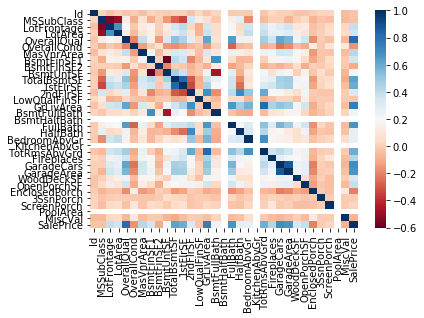

In [115]:
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap = "RdBu")
#As seen below arrival dates (months, year, week and date) are highly correlated.
#Ex: LotArea and Lot Frontage are highly negatively correlated (-0.68) therfore such variables have a higher multicolinearity
#    or PCA can be performed 

In [96]:
#onehot
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_cat1=df_cat.select_dtypes(include =['object']) 
df_cat1.drop(["Alley","PoolQC","Fence","MiscFeature"], axis='columns',inplace = True)
df_cat1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  MasVnrType     1452 non-null   object
 17  ExterQual      1460 non-null   object
 18  ExterCond      1460 non-null

In [97]:
#replacing nulll values with mode
for column in df_cat1.columns:
    df_cat1[column].fillna(df_cat1[column].mode()[0], inplace=True)
df_cat1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  MasVnrType     1460 non-null   object
 17  ExterQual      1460 non-null   object
 18  ExterCond      1460 non-null

C:\Users\sanje\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [98]:
X_2 = df_cat1.apply(le.fit_transform)
X_2

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,...,2,6,2,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,...,3,6,4,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,...,2,6,4,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,...,2,6,2,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,...,2,6,4,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,3,0,4,0,8,2,2,...,3,6,4,1,1,4,4,2,8,4
1456,3,1,3,3,0,4,0,14,2,2,...,3,2,4,1,2,4,4,2,8,4
1457,3,1,3,3,0,4,0,6,2,2,...,2,6,2,1,1,4,4,2,8,4
1458,3,1,3,3,0,4,0,12,2,2,...,2,6,2,1,2,4,4,2,8,4


In [116]:
#Merge numerical and categocial variables (after variable transformation) in order to perform modeling 
df_merge =df_num1.merge(X_2,left_index=True, right_index=True, suffixes=('_x','_y'))
df_merge

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1.0,60.0,65.0,8450.0,7.0,5.0,196.0,706.0,0.0,150.0,...,2,6,2,1,1,4,4,2,8,4
2,3.0,60.0,68.0,11250.0,7.0,5.0,162.0,486.0,0.0,434.0,...,2,6,4,1,1,4,4,2,8,4
4,5.0,60.0,84.0,14260.0,8.0,5.0,350.0,655.0,0.0,490.0,...,2,6,4,1,1,4,4,2,8,4
6,7.0,20.0,75.0,10084.0,8.0,5.0,186.0,1369.0,0.0,317.0,...,2,6,2,1,1,4,4,2,8,4
10,11.0,20.0,70.0,11200.0,5.0,5.0,0.0,906.0,0.0,134.0,...,3,6,2,5,2,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,1453.0,180.0,35.0,3675.0,5.0,5.0,80.0,547.0,0.0,0.0,...,3,6,2,2,0,4,4,2,8,4
1453,1454.0,20.0,90.0,17217.0,5.0,5.0,0.0,0.0,0.0,1140.0,...,3,6,2,1,2,4,4,2,8,0
1454,1455.0,20.0,62.0,7500.0,7.0,5.0,0.0,410.0,0.0,811.0,...,2,6,2,1,1,4,4,2,8,4
1455,1456.0,60.0,62.0,7917.0,6.0,5.0,0.0,0.0,0.0,953.0,...,3,6,4,1,1,4,4,2,8,4


In [ ]:
#Linear Regression

In [118]:
X = df_merge.drop(['SalePrice'], axis = 'columns')
y = df_merge.loc[:,'SalePrice']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.15, random_state = 0)

In [120]:
li_re = LinearRegression()

In [121]:
li_re.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [129]:
ypred_lire = li_re.predict(X_test)

In [135]:
#This model has high r^2. Although with real-world data, 
#   the score is usually 60-70%, for the purposes of this project, it is considered a good predictive indicator
print('R2 for multiple reg model is :',r2_score(y_test,ypred_lire))

R2 for multiple reg model is : 0.8903118273318881
